In [17]:
import pandas as pd
from wqchartpy import gibbs
from wqchartpy import triangle_piper
from wqchartpy import contour_piper
from wqchartpy import schoeller

import warnings
warnings.filterwarnings("ignore")

In [18]:
mgdf = pd.read_excel('../PuntosMuestreoUNAL.xlsx',sheet_name='Muestreo mgL')

mgdf['time'] = pd.to_datetime(mgdf['Fecha'])
mgdf.set_index('time',inplace=True)


Pts = mgdf['Punto de Control'].unique()
Ndfs = []
for pt in Pts:
    df = mgdf.loc[mgdf['Punto de Control']==pt]
    mdf = df.groupby(df.index.month)[[ 'pH', 'HCO3', 'CO3', 'Ca', 'Mg', 'Fe', 'Mn', 'K', 'Na', 'F', 'NO2', 'NO3', 'Cl', 'SO4', 'PO4', 'TDS', 'BALANCE CBE']].mean()
    mdf['Punto de Control'] = pt
    mdf['Label'] = df['Label'][0]
    mdf['Size'] = df['Size'][0]
    mdf['Marker'] = df['Marker'][0]
    mdf['Alpha'] = df['Alpha'][0]
    mdf['Color'] = df['Color'][0]
    Ndfs.append(mdf)
Ndf = pd.concat(Ndfs)
Ndf.reset_index(inplace=True)

1
Gibbs plot created. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica\Grouped 

Trilinear Piper plot created. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica\Grouped 

Schoeller diagram created. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica\Grouped 

2
Gibbs plot created. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica\Grouped 

Trilinear Piper plot created. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica\Grouped 

Schoeller diagram created. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica\Grouped 

3
Gibbs plot created. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica\Grouped 

Trilinear Piper plot created. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica\Grouped 

Schoeller diagram created. Sav

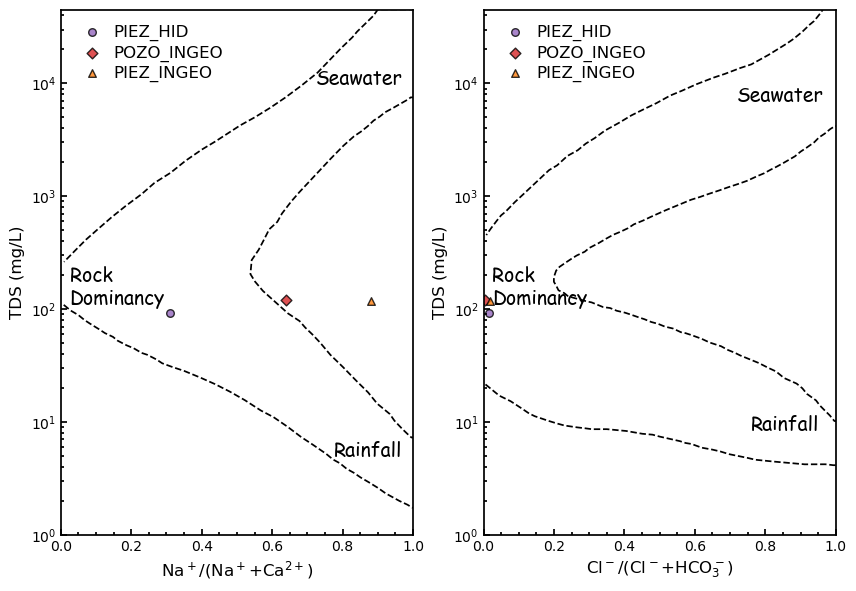

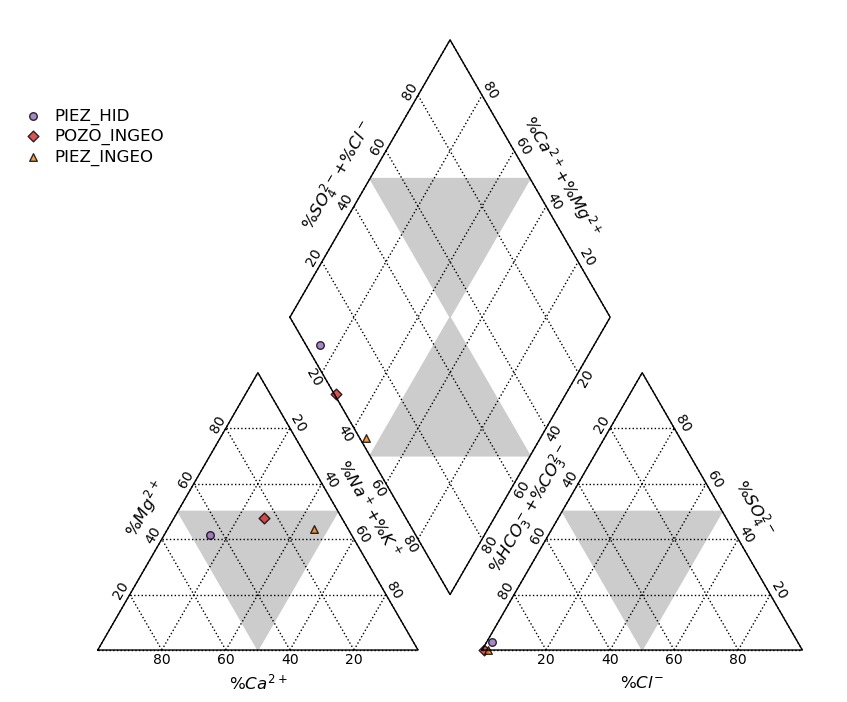

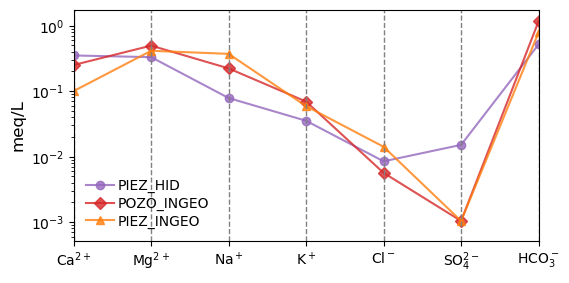

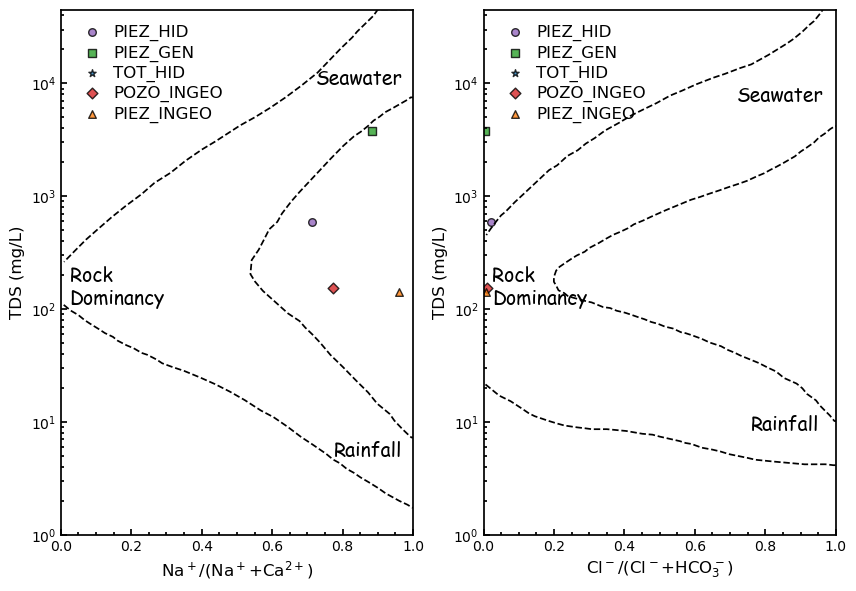

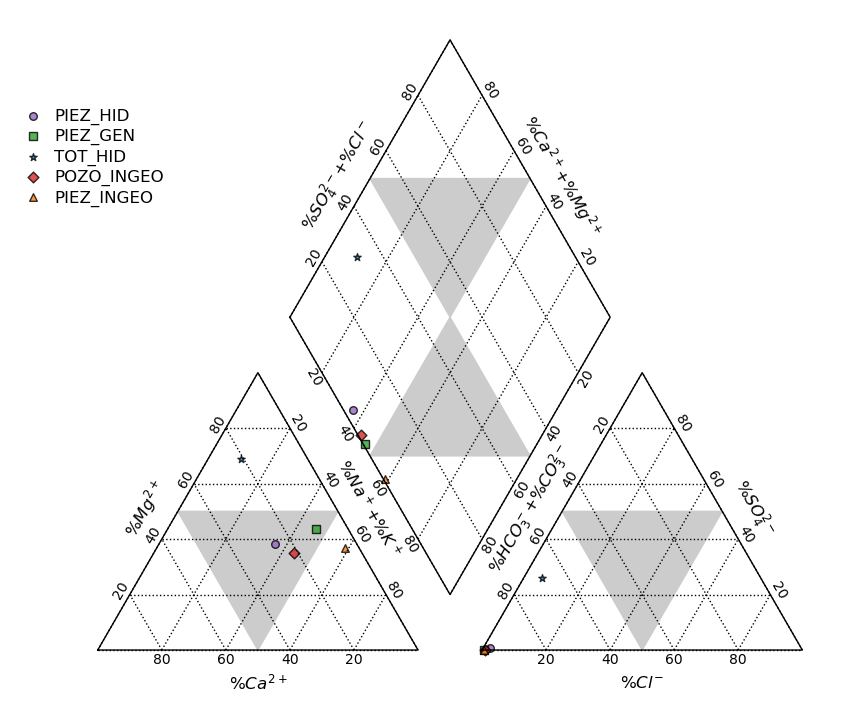

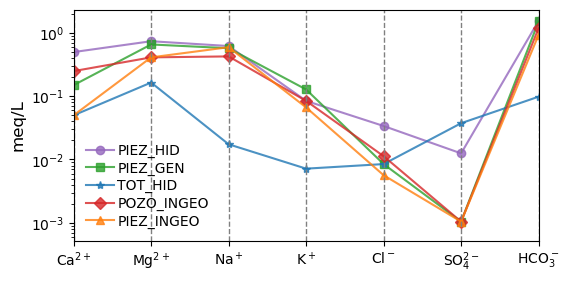

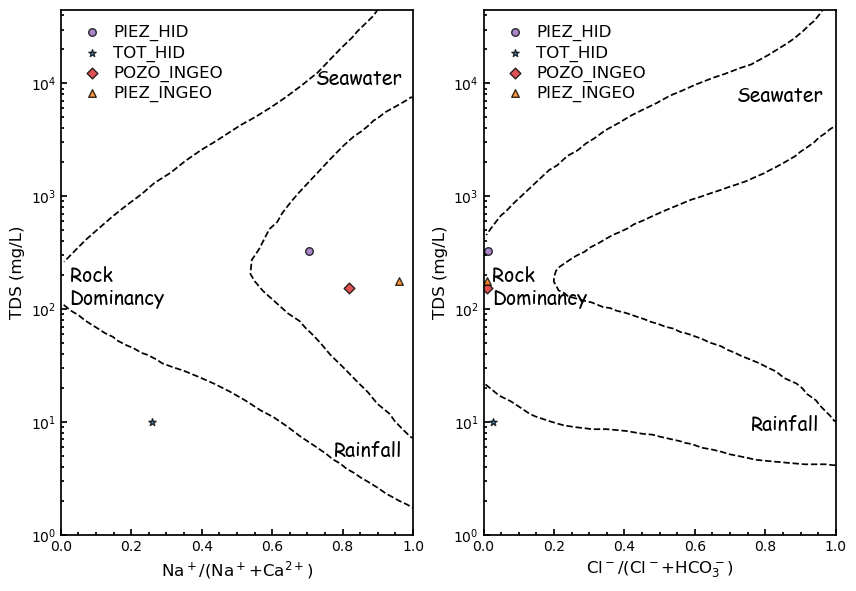

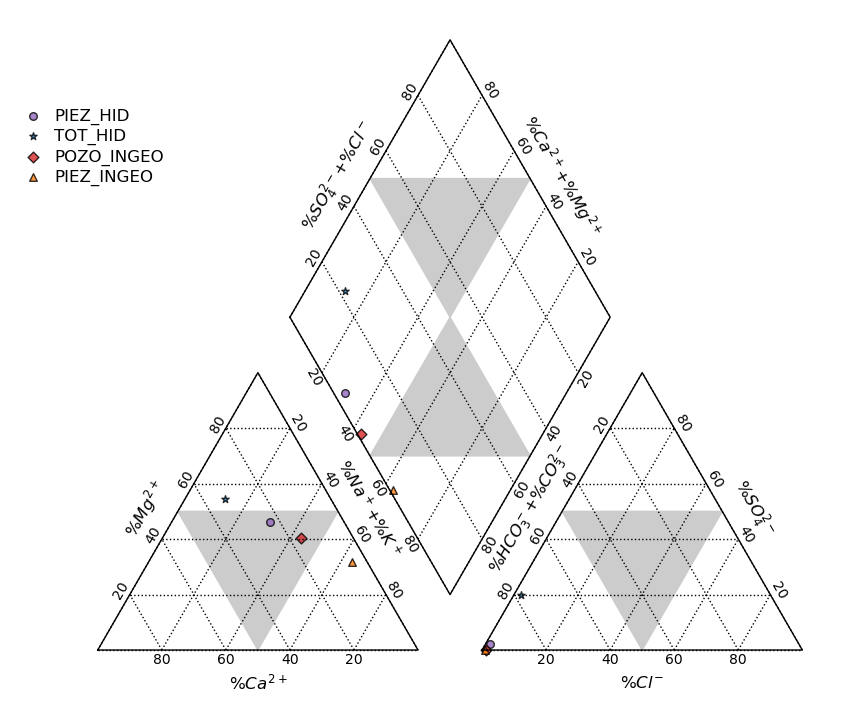

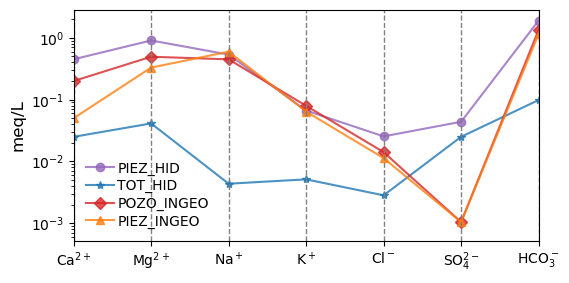

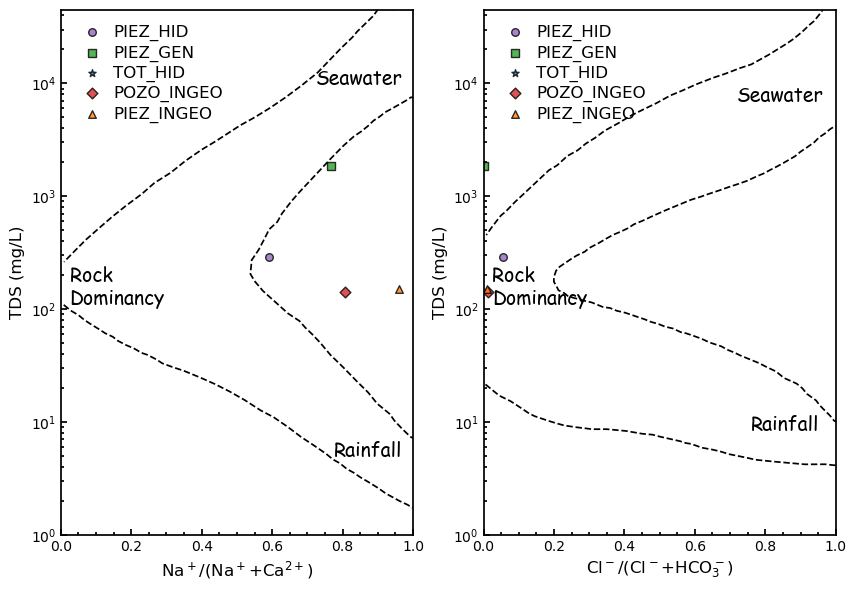

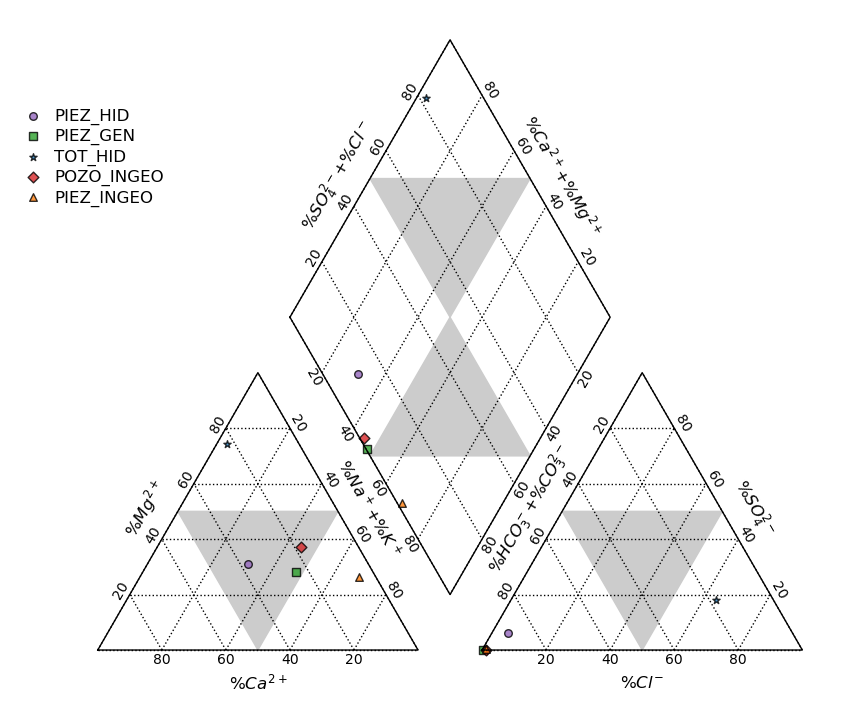

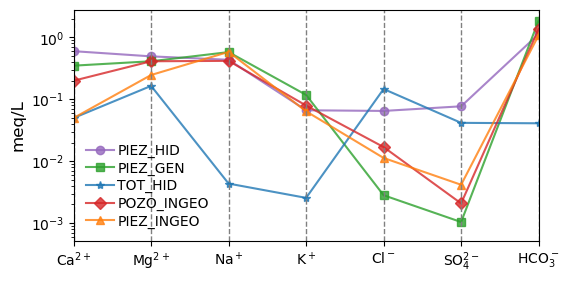

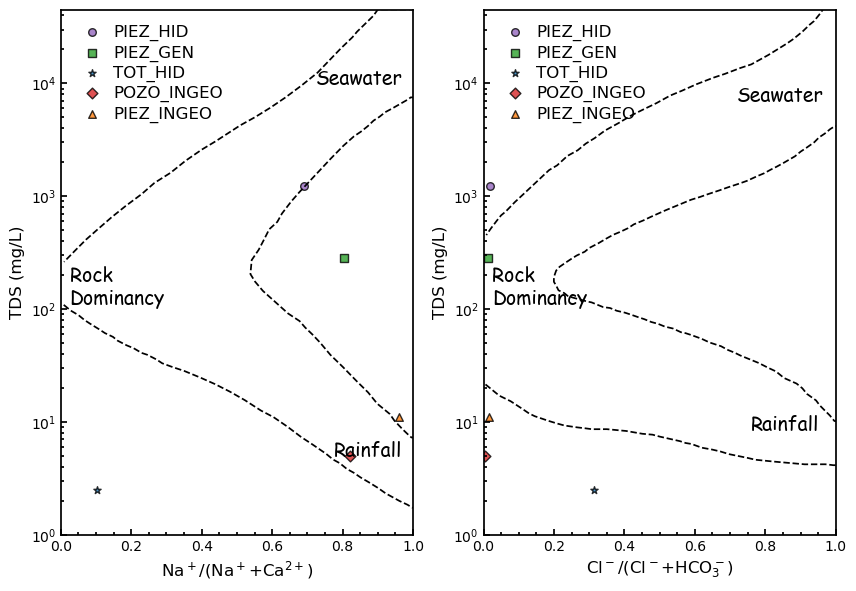

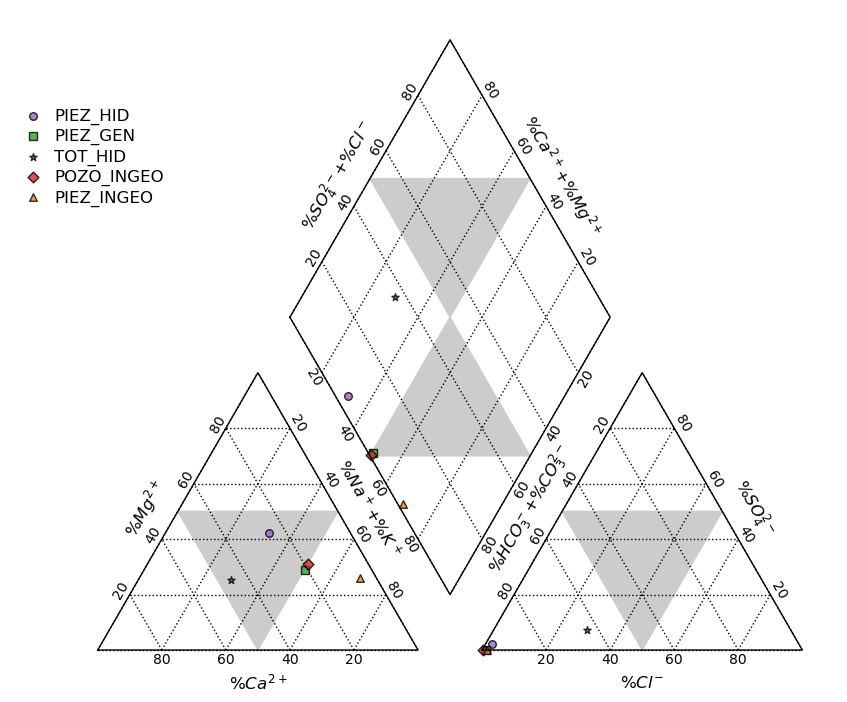

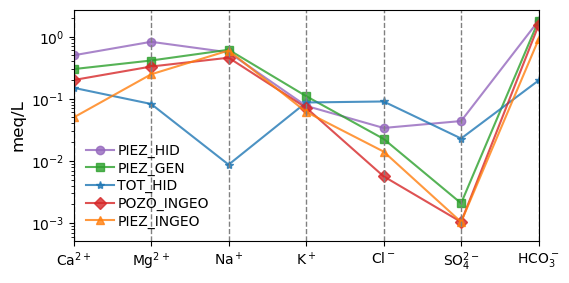

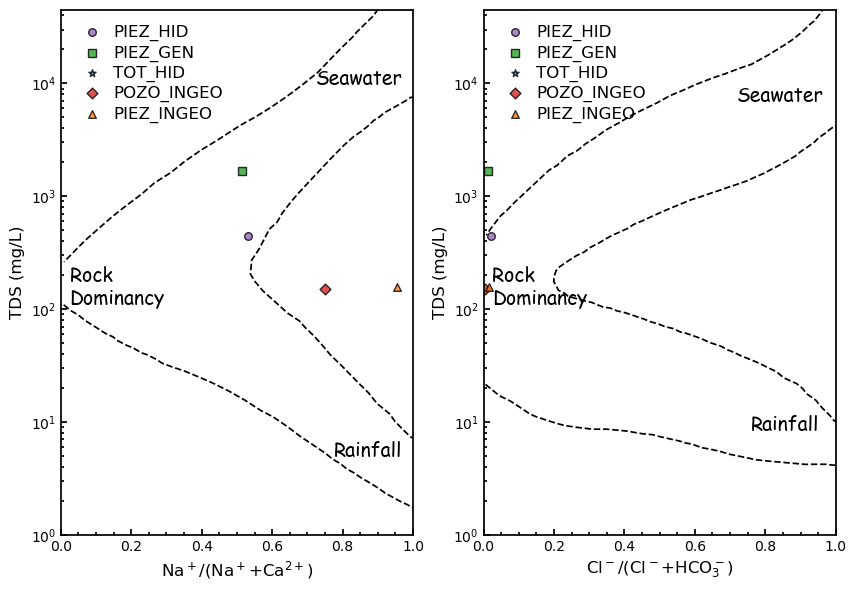

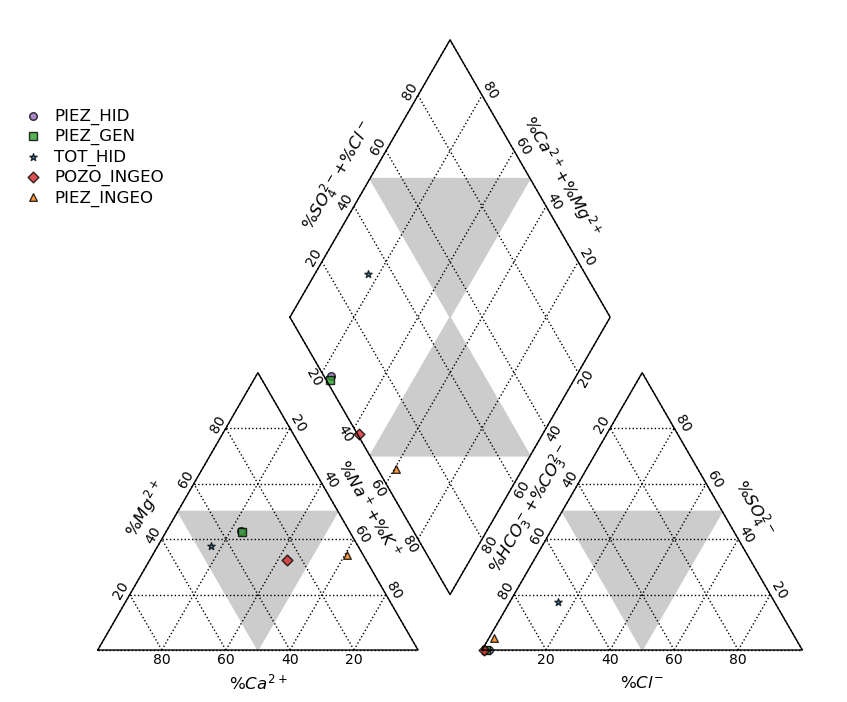

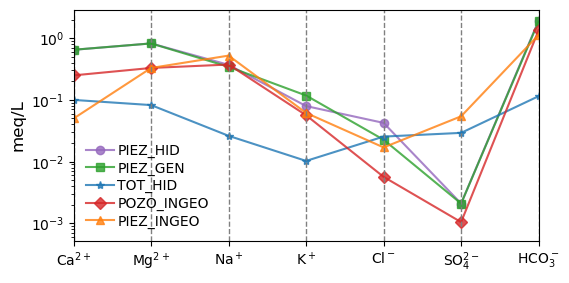

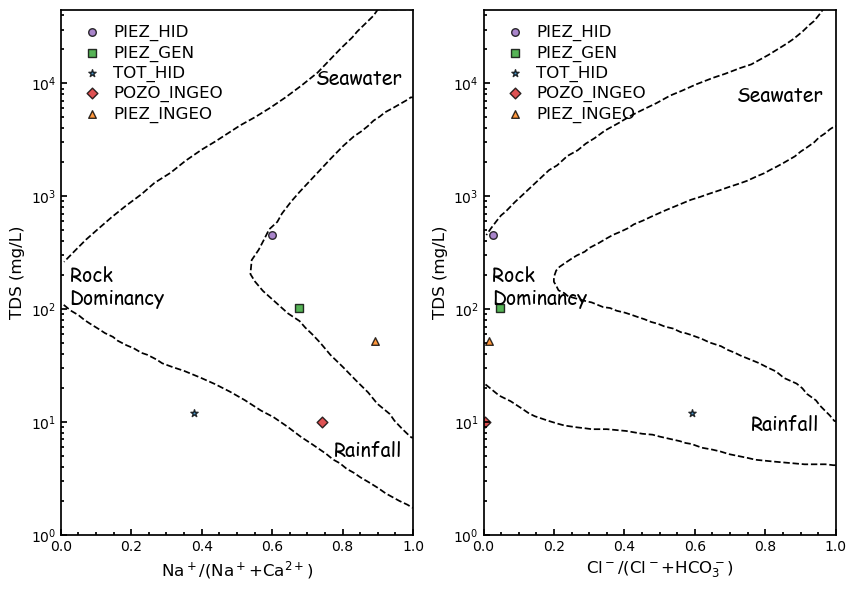

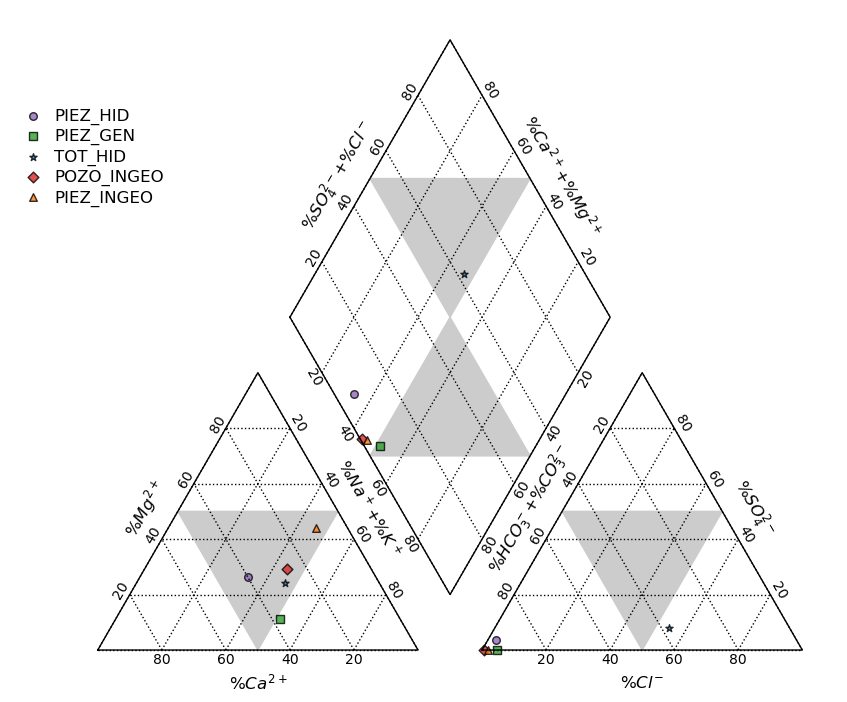

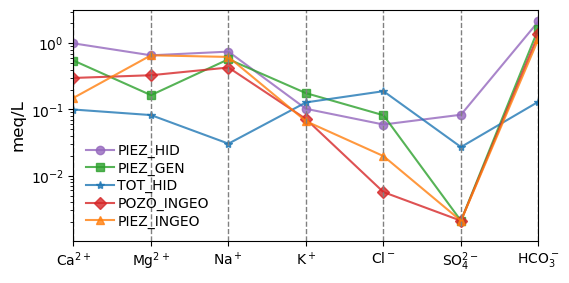

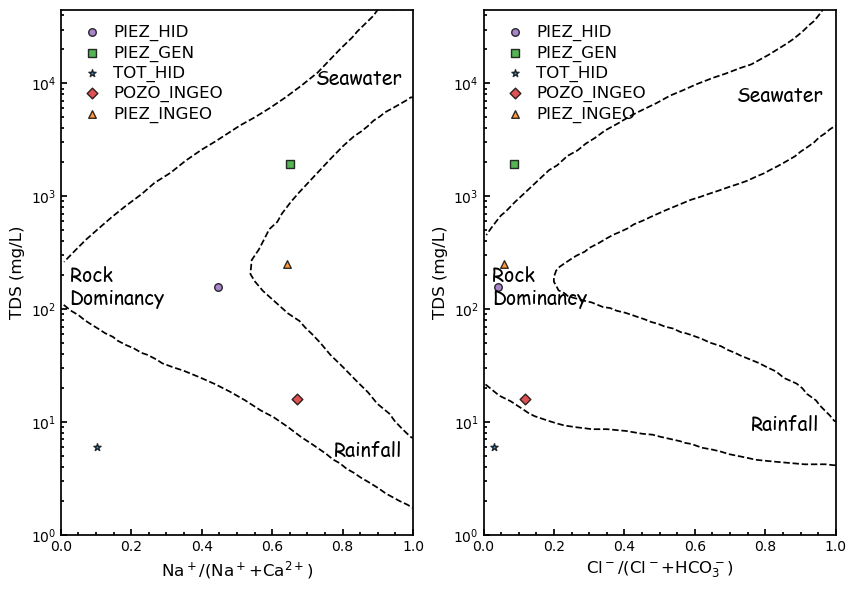

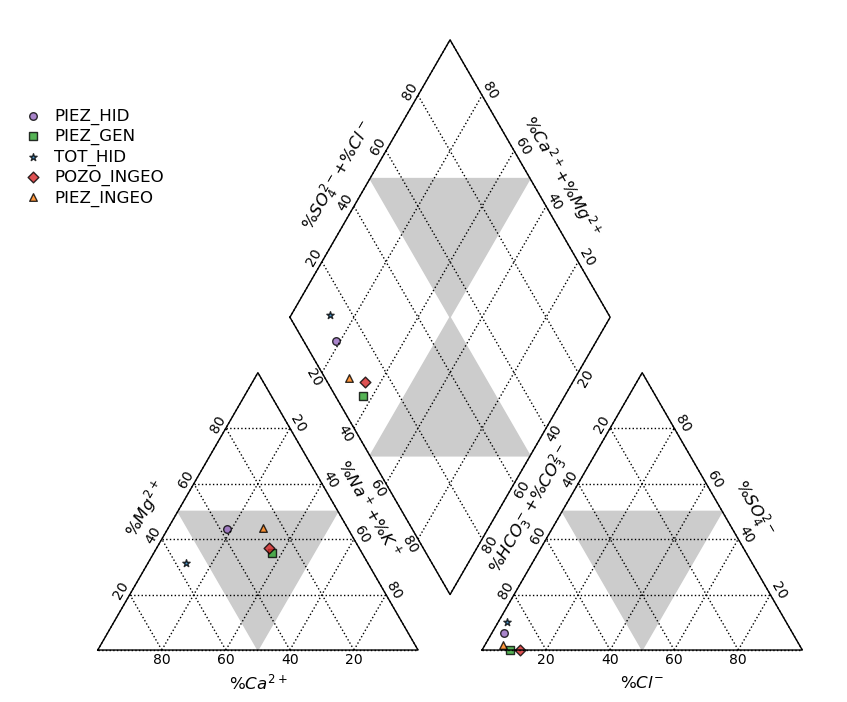

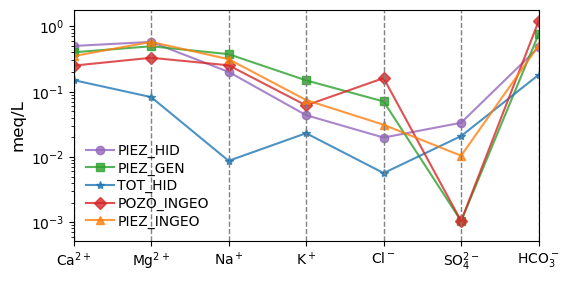

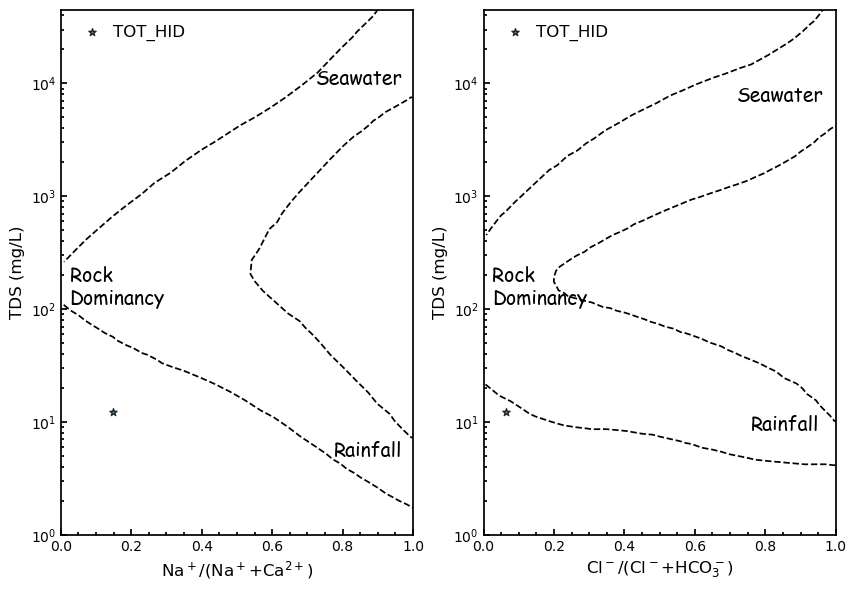

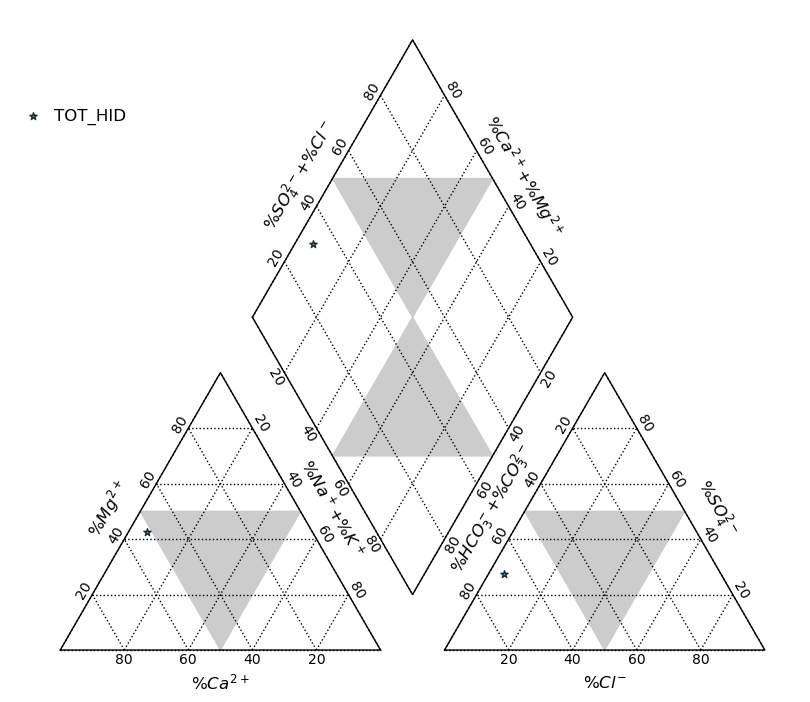

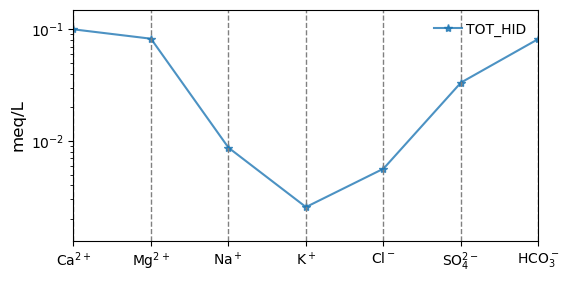

In [20]:
for time in Ndf['time'].unique():
    print(time)
    Mgdf = Ndf.loc[Ndf['time']==time]
    Mgdf = Mgdf.drop('time',axis=1)
    Mgdf.reset_index(inplace=True)
    gibbs.plot(Mgdf, unit='mg/L', figname=f"Gibbs diagram Month {time}", figformat='jpg')
    triangle_piper.plot(Mgdf, unit='mg/L', figname=f"triangle Piper diagram Month {time}", figformat='jpg')
    schoeller.plot(Mgdf, unit='mg/L', figname=f"Schoeller diagram Month {time}", figformat='jpg')